In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('salary_data_cleaned.csv')

In [28]:
df.head()

,Job Title,Salary Estimate,Job Function,Job Description,Company Name,Rating,Location,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,job_state,age,python_in,studio_in,spark_in,aws_in,excel_in
0,Staff Data Scientist,$111K - $194K (Glassdoor est.),Data Scientist,WHO WE ARE:\nVoted one of the Top 100 Fastest ...,Freedom Financial Network,3.5,"San Mateo, CA",1001 to 5000 Employees,2002,Company - Private,...,194,152.5,Freedom Financial Netw,CA,19,0,0,0,0,0
1,Staff Data Scientist,$118K - $193K (Glassdoor est.),Data Scientist,About Us\n\nOn the off chance you've thought a...,Metromile,4.1,"San Francisco, CA",201 to 500 Employees,2011,Company - Public,...,193,155.5,Metrom,CA,10,1,0,1,1,1
2,Staff Scientist Virtual Hiring Event,$80K - $232K (Glassdoor est.),Non Title,Bio-Rad Virtual Interviews\n\nEvent Details\nD...,Bio-Rad,3.4,"San Ramon, CA",5001 to 10000 Employees,1952,Company - Public,...,232,156.0,Bio-,CA,69,0,0,0,0,1
3,Scientist,$70K - $155K (Glassdoor est.),Research Scientist,Scientist – Cell Biology\nJob Title: Scientist...,ALSTEM,-1.0,"San Pablo, CA",-1,-1,-1,...,155,112.5,ALSTEM,CA,-1,0,0,0,0,0
4,"Scientist I, Protein Engineering",$99K - $217K (Glassdoor est.),Research Scientist,"Who we are\n\n23andMe, the leading consumer ge...",23andMe,4.2,"South San Francisco, CA",501 to 1000 Employees,2006,Company - Private,...,217,158.0,23an,CA,15,0,0,0,1,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in'],
      dtype='object')

In [29]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
 
		
## hourly wage to annual 

#remove new line from job title

In [30]:
## Job title 
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [31]:
df.job_simp.value_counts()

na                8
data scientist    4
data engineer     2
manager           1
Name: job_simp, dtype: int64

In [32]:
## Job seniority
df['seniority'] = df['Job Title'].apply(seniority)

In [33]:
df.seniority.value_counts()

na        13
senior     2
Name: seniority, dtype: int64

In [34]:
##  Fix state Los Angeles
df.job_state.value_counts()


 CA    15
Name: job_state, dtype: int64

In [35]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x:len(x))

In [36]:
df['desc_len']

0     1259
1     6803
2     3453
3      824
4     4706
5      709
6     3722
7     1057
8     1057
9      893
10    2617
11     630
12     887
13     666
14    1057
Name: desc_len, dtype: int64

In [37]:
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [38]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,111,194
1,0,118,193
2,0,80,232
3,0,70,155
4,0,99,217
5,0,69,214
6,0,86,226
7,0,110,198
8,0,99,170
9,0,59,114


In [40]:
#df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

AttributeError: 'float' object has no attribute 'replace'

In [41]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_in,studio_in,spark_in,aws_in,excel_in,desc_len
count,15.000000,15.000000,15.0,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000
mean,2.526667,1440.800000,0.0,0.0,88.200000,183.266667,135.733333,40.733333,0.200000,0.0,0.133333,0.200000,0.266667,2022.666667
std,2.221475,900.868724,0.0,0.0,17.172237,34.143535,22.274158,48.227832,0.414039,0.0,0.351866,0.414039,0.457738,1856.030313
min,-1.000000,-1.000000,0.0,0.0,59.000000,114.000000,86.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,630.000000
25%,1.150000,950.500000,0.0,0.0,77.000000,162.500000,120.000000,2.500000,0.000000,0.0,0.000000,0.000000,0.000000,855.500000
50%,3.500000,1931.000000,0.0,0.0,86.000000,193.000000,141.500000,15.000000,0.000000,0.0,0.000000,0.000000,0.000000,1057.000000
75%,3.950000,2004.000000,0.0,0.0,99.000000,206.000000,154.750000,79.500000,0.000000,0.0,0.000000,0.000000,0.500000,3035.000000
max,4.300000,2015.000000,0.0,0.0,118.000000,232.000000,158.000000,119.000000,1.000000,0.0,1.000000,1.000000,1.000000,6803.000000


In [42]:
df.columns()

TypeError: 'Index' object is not callable

In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

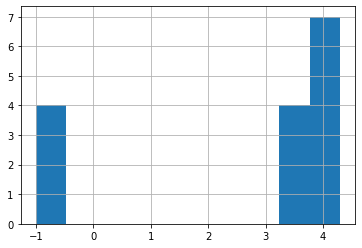

In [45]:
df.Rating.hist()

<AxesSubplot:>

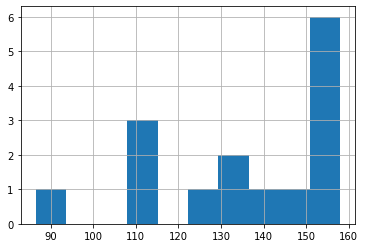

In [46]:
df.avg_salary.hist()

<AxesSubplot:>

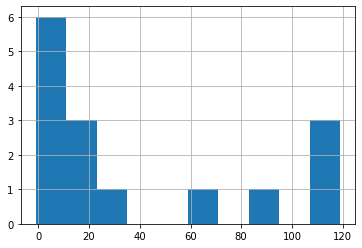

In [47]:
df.age.hist()

<AxesSubplot:>

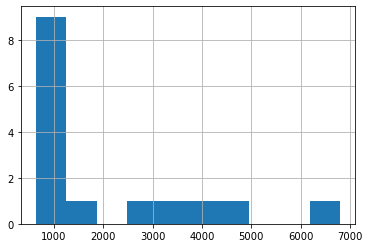

In [48]:
df.desc_len.hist()

<AxesSubplot:>

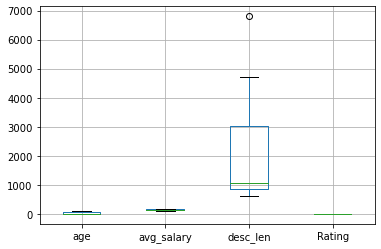

In [49]:
df.boxplot(column = ['age','avg_salary','desc_len','Rating'])

<AxesSubplot:>

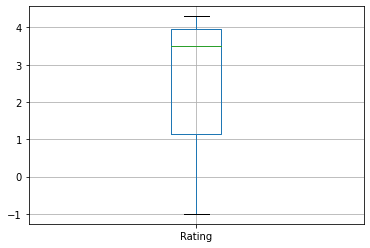

In [50]:
df.boxplot(column = 'Rating')

In [55]:
df[['age','avg_salary','desc_len','Rating','desc_len']].corr()

,age,avg_salary,desc_len,Rating,desc_len
age,1.000000,-0.176642,-0.241143,0.536767,-0.241143
avg_salary,-0.176642,1.000000,0.550297,0.124876,0.550297
desc_len,-0.241143,0.550297,1.000000,0.460066,1.000000
Rating,0.536767,0.124876,0.460066,1.000000,0.460066
desc_len,-0.241143,0.550297,1.000000,0.460066,1.000000


<AxesSubplot:>

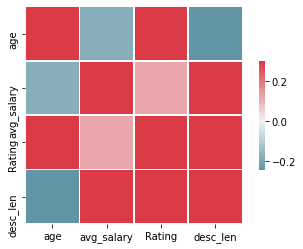

In [57]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [59]:
df_cat=df[['Location','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in', 'job_simp', 'seniority']]

graph for Location: total = 9


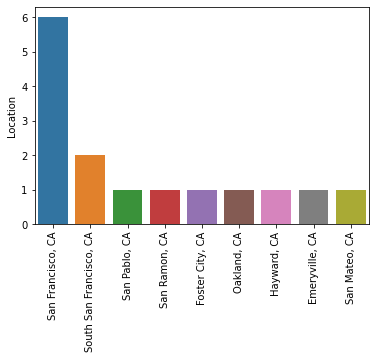

graph for Size: total = 6


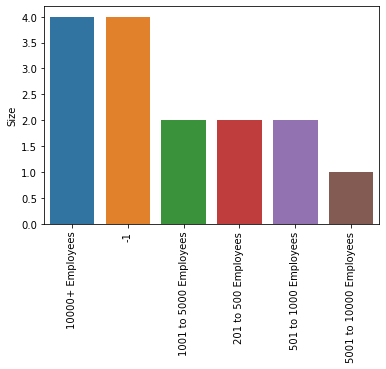

graph for Type of ownership: total = 4


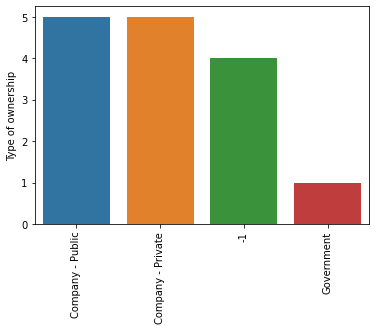

graph for Industry: total = 6


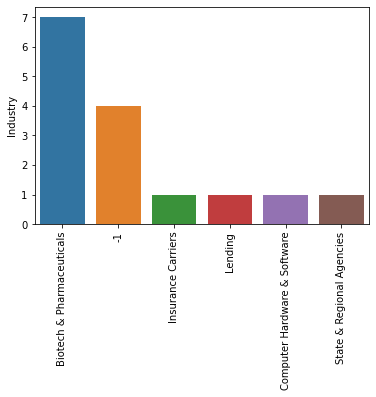

graph for Sector: total = 6


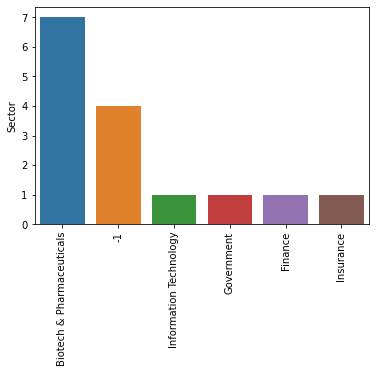

graph for Revenue: total = 5


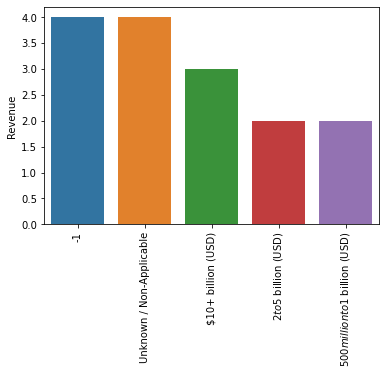

graph for company_txt: total = 11


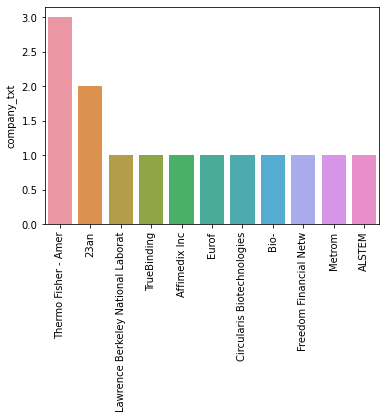

graph for job_state: total = 1


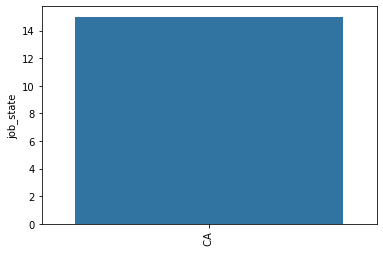

graph for python_in: total = 2


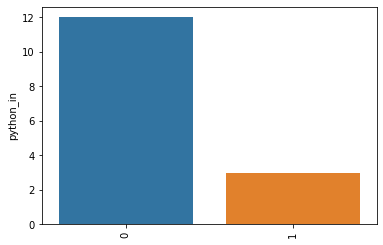

graph for studio_in: total = 1


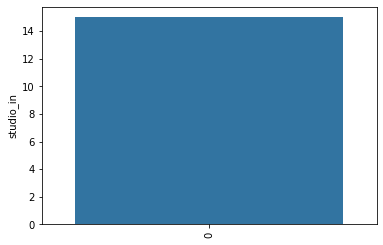

graph for spark_in: total = 2


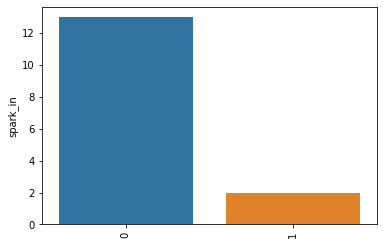

graph for aws_in: total = 2


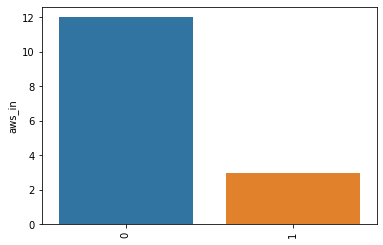

graph for excel_in: total = 2


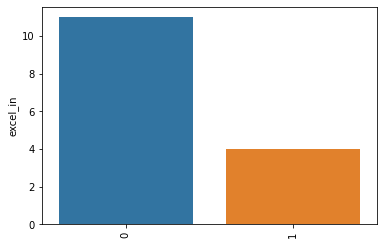

graph for job_simp: total = 4


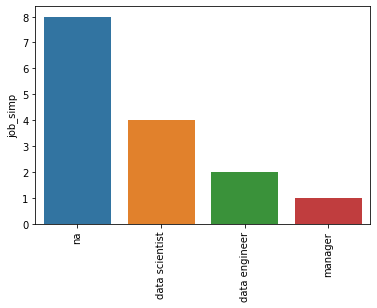

graph for seniority: total = 2


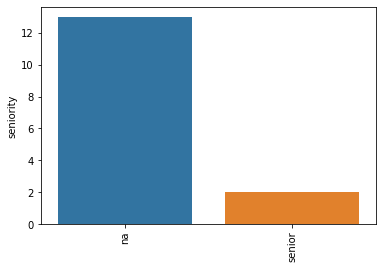

In [60]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

graph for Location: total = 9


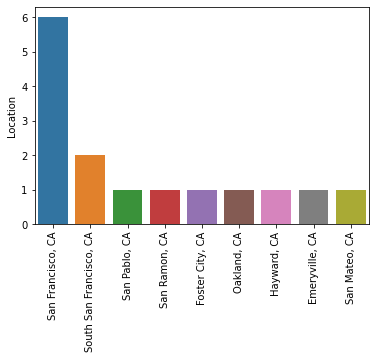

graph for company_txt: total = 11


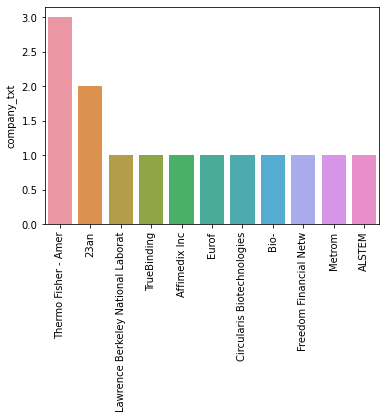

graph for job_state: total = 1


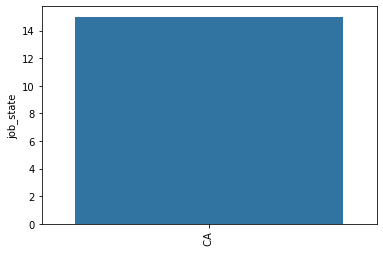

In [61]:
for i in df_cat[['Location','company_txt','job_state']]:
    cat_num = df_cat[i][:20].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [63]:
pd.pivot_table(df, index='job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data engineer,121.5000
data scientist,149.1250
manager,148.0000
na,131.0625


In [64]:
pd.pivot_table(df, index= ['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
data engineer  na           108.0000
               senior       135.0000
data scientist na           149.1250
manager        senior       148.0000
na             na           131.0625

In [65]:
pd.pivot_table(df, index= 'job_state', values='avg_salary')

,avg_salary
job_state,
CA,135.733333


In [66]:

pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
 CA       data engineer     121.5000
          data scientist    149.1250
          manager           148.0000
          na                131.0625

In [67]:

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [69]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
 CA       data engineer            2
          data scientist           4
          manager                  1
          na                       8

In [70]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,149.125


In [71]:

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_in', 'studio_in', 'spark_in',
       'aws_in', 'excel_in', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [72]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [78]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_in', 'studio_in', 'spark_in', 'aws_in', 'excel_in', 'Type of ownership','avg_salary']]


In [84]:

for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.2    157.000000
 3.4    156.000000
 4.1    155.500000
 3.5    143.750000
-1.0    132.375000
 3.8    132.166667
 4.3    110.500000
 3.3     86.500000
Industry
                              avg_salary
Industry                                
Insurance Carriers            155.500000
Lending                       152.500000
Biotech & Pharmaceuticals     136.142857
Computer Hardware & Software  135.000000
-1                            132.375000
State & Regional Agencies     110.500000
Sector
                           avg_salary
Sector                               
Insurance                  155.500000
Finance                    152.500000
Biotech & Pharmaceuticals  136.142857
Information Technology     135.000000
-1                         132.375000
Government                 110.500000
Revenue
                                  avg_salary
Revenue                                     
Unknown / Non-Applicable          151.125000
-1          

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [85]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_in', values = 'avg_salary', aggfunc = 'count')

python_in,0,1
Revenue,,
$10+ billion (USD),3.0,NaN
$2 to $5 billion (USD),2.0,NaN
$500 million to $1 billion (USD),2.0,NaN
-1,4.0,NaN
Unknown / Non-Applicable,1.0,3.0


In [86]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [87]:
!pip install wordcloud

In [88]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [90]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\samriddhi/nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\samriddhi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [91]:
import nltk

In [92]:
pip install nltk.corpus

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [93]:
pip install nltk.tokenize

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.tokenize (from versions: none)
ERROR: No matching distribution found for nltk.tokenize


In [94]:
import nltk

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samriddhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\samriddhi/nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\samriddhi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\samriddhi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [97]:
import nltk

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samriddhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

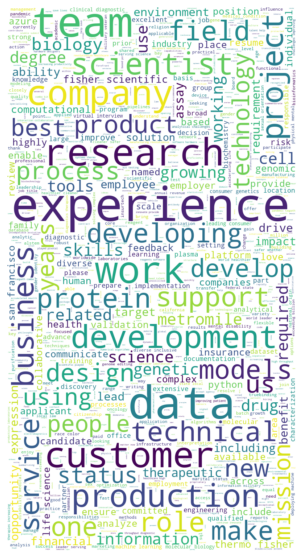

In [100]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()